### LGMVIP INTERNSHIP TASK 2

STOCK MARKET PRICE PREDICTION

NAME: ABRAR HUSSAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data['Date']

0       2018-09-28
1       2018-09-27
2       2018-09-26
3       2018-09-25
4       2018-09-24
           ...    
2030    2010-07-27
2031    2010-07-26
2032    2010-07-23
2033    2010-07-22
2034    2010-07-21
Name: Date, Length: 2035, dtype: object

### CHANGING THE DATATYPE FROM OBJECT TO DATE

In [6]:
from ast import Return
import datetime
def string_to_date(date):
    split = date.split('-')
    year,month,day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year,month = month , day = day)


In [7]:
data['Date'] = data['Date'].apply(string_to_date)

In [8]:
data['Date']

0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
          ...    
2030   2010-07-27
2031   2010-07-26
2032   2010-07-23
2033   2010-07-22
2034   2010-07-21
Name: Date, Length: 2035, dtype: datetime64[ns]

REMOVING THE INDEX TO PLOT ACCORDING TO DATE

In [9]:
data.index = data.pop('Date')


In [10]:
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


PLOTTING WITH DATE

Text(0, 0.5, 'Share Value')

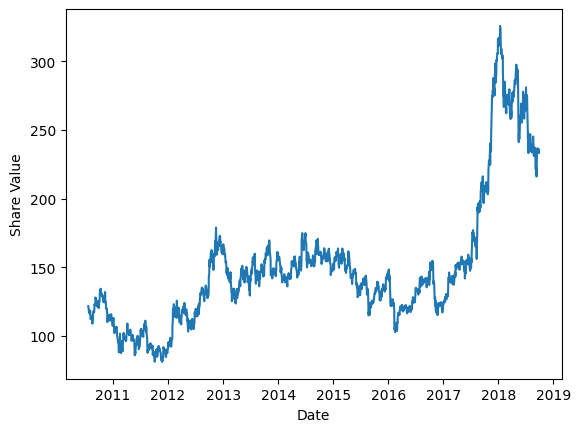

In [11]:
plt.plot(data.index,data['Close'])
plt.xlabel('Date')
plt.ylabel('Share Value')

APLYING MINMAX SCALER BECAUSE LSTM ARE SENSITIVE TO THE SCALE OF DATA

In [12]:
data.shape

(2035, 7)

In [13]:
df = data.reset_index()['Close']

In [14]:
df.shape

(2035,)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range= (0,1))
df = scale.fit_transform(np.array(df).reshape(-1,1))


In [16]:
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

SPLITTING THE DATASET

In [17]:
training_set = int(len(df)*0.65)
test_set = len(df)-training_set
train_data,test_data = df[0:training_set,:],df[training_set:len(df),:1]

In [18]:
training_set

1322

In [19]:
test_set

713

In [20]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [21]:
test_data

array([[0.24652778],
       [0.23611111],
       [0.25204248],
       [0.25919118],
       [0.25776144],
       [0.2681781 ],
       [0.25449346],
       [0.27103758],
       [0.24530229],
       [0.26756536],
       [0.27267157],
       [0.26633987],
       [0.27410131],
       [0.28615196],
       [0.27818627],
       [0.27205882],
       [0.27124183],
       [0.27798203],
       [0.27083333],
       [0.25857843],
       [0.24285131],
       [0.2250817 ],
       [0.23447712],
       [0.24346405],
       [0.23611111],
       [0.22937092],
       [0.21527778],
       [0.20976307],
       [0.20751634],
       [0.2060866 ],
       [0.20445261],
       [0.20098039],
       [0.21180556],
       [0.19301471],
       [0.18974673],
       [0.20302288],
       [0.21752451],
       [0.20629085],
       [0.19158497],
       [0.17381536],
       [0.17401961],
       [0.18361928],
       [0.17830882],
       [0.19362745],
       [0.20098039],
       [0.20486111],
       [0.21425654],
       [0.218

Convert an array of values in dataset Matrix

In [22]:
def create_dataset(data,timestep = 1):
    xdata,ydata = [],[]
    for i in range(len(data)-timestep-1):
        n = data[i:(i+timestep),0]
        xdata.append(n)
        ydata.append(data[i+timestep,0])
    return np.array(xdata),np.array(ydata)

RESHAPING THE DATA

In [23]:
timestop = 100
X_train, y_train = create_dataset(train_data,timestop)
X_test, y_test = create_dataset(test_data,timestop)

In [24]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [25]:
print(y_train)

[0.87111928 0.84497549 0.84027778 ... 0.27389706 0.25347222 0.26041667]


In [26]:
print(X_test)

[[0.24652778 0.23611111 0.25204248 ... 0.34681373 0.3500817  0.32618464]
 [0.23611111 0.25204248 0.25919118 ... 0.3500817  0.32618464 0.32271242]
 [0.25204248 0.25919118 0.25776144 ... 0.32618464 0.32271242 0.3247549 ]
 ...
 [0.13827614 0.13541667 0.13010621 ... 0.14562908 0.15236928 0.15400327]
 [0.13541667 0.13010621 0.12254902 ... 0.15236928 0.15400327 0.14971405]
 [0.13010621 0.12254902 0.12479575 ... 0.15400327 0.14971405 0.1621732 ]]


In [27]:
print(y_test)

[0.32271242 0.3247549  0.32148693 0.32352941 0.3255719  0.32638889
 0.33496732 0.34395425 0.3441585  0.34599673 0.35866013 0.35580065
 0.37214052 0.36294935 0.3754085  0.36315359 0.34640523 0.34579248
 0.34844771 0.35784314 0.34722222 0.33353758 0.33537582 0.33680556
 0.33680556 0.32271242 0.32638889 0.3188317  0.33986928 0.37765523
 0.3999183  0.36968954 0.35886438 0.35927288 0.35294118 0.32107843
 0.31413399 0.31740196 0.31597222 0.32209967 0.28267974 0.28492647
 0.27389706 0.28778595 0.30187908 0.31045752 0.32128268 0.31454248
 0.33129085 0.33292484 0.32802288 0.32291667 0.32802288 0.32312092
 0.30718954 0.29595588 0.30473856 0.28288399 0.28982843 0.30412582
 0.26429739 0.25285948 0.20710784 0.20261438 0.19566993 0.19546569
 0.20465686 0.18974673 0.19934641 0.1942402  0.21527778 0.21629902
 0.2183415  0.21997549 0.22222222 0.22753268 0.22732843 0.22324346
 0.21527778 0.20690359 0.20200163 0.19955065 0.20159314 0.1807598
 0.19178922 0.19403595 0.19566993 0.20445261 0.20772059 0.21221

In [28]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

CREATING THE LSTM MODEL

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


TRAINING THE MODEL

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 13s 300ms/step - loss: 0.0276 - val_loss: 0.0055
Epoch 2/100
20/20 [==============================] - 4s 213ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 5s 258ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 184ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 4s 184ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 4s 191ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 4s 191ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 4s 201ms/step - loss: 0.0012 - val_l

In [33]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

20/20 [==============================] - 1s 32ms/step


In [35]:
#Transforming to original form
train_pred = scale.inverse_transform(train_pred)
test_pred = scale.inverse_transform(test_pred)

CHECKING THE PERFORMANCE

In [36]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

167.51811764613336

In [37]:
math.sqrt(mean_squared_error(y_test,test_pred))

117.27765820878479